<a href="https://colab.research.google.com/github/TylerJSimpson/machine_learning_frameworks/blob/main/TF2_LinearRegression_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Minimal TensorFlow Example

### 1) Generate Data
### 2) Create Model
### 3) Create Objective Function
### 4) Create Optimization Algorithm

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 1) Generate Data

In [28]:
observations = 1000
xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

#save n-dimensional array as npz
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets) #(file name, arrays)

### 2) Create Model
### 3) Create Objective Function
### 4) Create Optimization Algorithm

In [30]:
training_data = np.load('TF_intro.npz')

In [55]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size) #equal to; output=np.dot(inputs,weights)+bias
                             #to customize:
                              #tf.keras.layers.Dense(output_size,
                              #  kernel_initializer=tf.random_uniform_initalizer(minval=-0.1, maxval=0.1)
                              #  bias_initializer=tf.random_uniform_initalizer(minval=-0.1, maxval=0.1)
                              #)
                            ])

model.compile(optimizer='sgd',loss = 'mean_squared_error') 

#tf.keras.optimizers for a full list
#tf.keras.losses for a full list

#SGD = stochastic gradient descent
#L2-norm loss = least sum of squares (least sum of squared error)
  #scaling by # observations = average(mean)

#If you don't want to use the preset SGD settings:
##custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
##model.compile(optimizer=custom_optimizer,loss = 'huber_loss') 

#huber loss deals with outliers well, less sensitive to them

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)
#epoch = iteration over the full data set
#verbose = 0 means 'silent' no output about the training is displayed
#verbose = 1 means 'progress bar'
#verbose = 2 means 'one line per epoch'

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 36.3310
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3275
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4677
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6480
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4246
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3616
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3477
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3452
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3382
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3393
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3463
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3387
Epoch 13/100
32/32 [================

### Extract the weights and bias

In [56]:
model.layers[0].get_weights()

[array([[ 2.0018198],
        [-3.0364788]], dtype=float32), array([5.018006], dtype=float32)]

In [57]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0018198],
       [-3.0364788]], dtype=float32)

In [58]:
bias = model.layers[0].get_weights()[1]
bias

array([5.018006], dtype=float32)

### Extract the outputs (make predictions)

In [59]:
model.predict_on_batch(training_data['inputs']).round(1)
#there are the values that were compared to the targets to evaluate the loss function 

array([[ 46.6],
       [-17.5],
       [-13.3],
       [ 31. ],
       [-23.7],
       [  9.8],
       [ 16.3],
       [-36.9],
       [  7.3],
       [-10. ],
       [-21.6],
       [ 29.7],
       [ -5.5],
       [-20. ],
       [-28.2],
       [ 14. ],
       [-29.9],
       [ 21.2],
       [ 22.9],
       [ 48.5],
       [  1.4],
       [-26.7],
       [ 23.4],
       [ 39.9],
       [  2.9],
       [ 29.4],
       [ 22.8],
       [-12.3],
       [-29.6],
       [ 16.4],
       [-24.8],
       [  9.2],
       [ -4.3],
       [ 28.3],
       [ 12.9],
       [  1. ],
       [-19.9],
       [ 36.9],
       [-17.8],
       [ 18.1],
       [ 51.9],
       [ -9.5],
       [ 28.4],
       [ -7.2],
       [-23.3],
       [ 28.1],
       [-14. ],
       [-21. ],
       [-30.2],
       [  0.3],
       [ -7.2],
       [ 49.9],
       [  7.2],
       [ 21.1],
       [-25.7],
       [ 17.8],
       [-18.9],
       [  2.4],
       [-35.8],
       [-12.8],
       [ -5.7],
       [ -3.8],
       [

In [60]:
#compare with training targets
training_data['targets'].round(1)

array([[ 46. ],
       [-16.3],
       [-13.3],
       [ 31.3],
       [-22.7],
       [ 10.4],
       [ 16.5],
       [-37.5],
       [  7.2],
       [ -8.9],
       [-21.3],
       [ 30.3],
       [ -6.2],
       [-20.6],
       [-28.2],
       [ 13.1],
       [-29.7],
       [ 21.2],
       [ 22.3],
       [ 48.2],
       [  0.6],
       [-26.8],
       [ 22.4],
       [ 39.2],
       [  1.9],
       [ 28.8],
       [ 21.9],
       [-12.4],
       [-29.1],
       [ 16.3],
       [-25. ],
       [  9.6],
       [ -4.1],
       [ 28.8],
       [ 12.9],
       [  0.7],
       [-19.9],
       [ 36.2],
       [-17.4],
       [ 17.8],
       [ 50.5],
       [ -8.5],
       [ 29.2],
       [ -7.7],
       [-23.5],
       [ 27.8],
       [-13.6],
       [-21.2],
       [-30.2],
       [  1.3],
       [ -6.6],
       [ 50.3],
       [  7.1],
       [ 21.3],
       [-24.6],
       [ 17. ],
       [-19. ],
       [  3.2],
       [-35. ],
       [-11.9],
       [ -5.7],
       [ -3.6],
       [

### Plotting the data

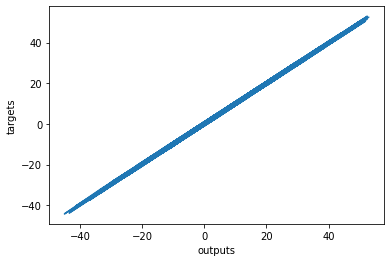

In [61]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()